#Import data

In [ ]:
import numpy as np
# To read file
import pandas as pd
# For plotting purpose
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import mutual_info_classif, SelectKBest, RFE
from sklearn.tree import DecisionTreeClassifier

#Read data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/CasestudiesAAIC/self case study12/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/CasestudiesAAIC/self case study12/test.csv')

#Preprocessing

Inorder to perform classifiaction we have several preprocessing steps 

https://towardsdatascience.com/data-pre-processing-techniques-you-should-know-8954662716d6

https://github.com/sahilsharma884/Dont_OverfitII/blob/master/2_FeatureEngg.ipynb

## Scaling

In [ ]:
df_train_x=df_train.drop(['id','target'],axis=1)
df_test=df_test.drop(['id'],axis=1)

In [ ]:
scaler  = StandardScaler()
X_scaled_train  = scaler.fit_transform(df_train_x)
X_scaled_test = scaler.transform(df_test)

In [ ]:
df_train['target'].value_counts()

1.0    160
0.0     90
Name: target, dtype: int64

Data is slightly imbalanced. So we have ways 
1. Oversampling minority class
2. Undersampling majority class

## Oversampling 

#https://towardsdatascience.com/7-over-sampling-techniques-to-handle-imbalanced-data-ec51c8db349f
There are many methods for oversampling out of which SMOTE is best method to avoid overfitting.

In [ ]:
smote = SMOTE()
X = df_train.drop(['id','target'], axis=1)
y = df_train['target']
Xo_train, yo_train = smote.fit_resample(X, y)
print(Xo_train.shape, yo_train.shape)

(320, 300) (320,)


In [ ]:
yo_train.value_counts()

1.0    160
0.0    160
Name: target, dtype: int64

##UnderSampling

In [ ]:
under = RandomUnderSampler(sampling_strategy=1.0)
Xou_train, you_train = under.fit_resample(X, y)
print(Xou_train.shape, you_train.shape) 

(180, 300) (180,)


In [ ]:
you_train.value_counts()

0.0    90
1.0    90
Name: target, dtype: int64

##OverUnder sampling

In [ ]:
smote = SMOTE(sampling_strategy=0.75)
Xo_train, yo_train = smote.fit_resample(X, y)
print(Xo_train.shape, yo_train.shape) 

under = RandomUnderSampler(sampling_strategy=1.0)
Xou_train, you_train = under.fit_resample(Xo_train, yo_train)
print(Xou_train.shape, you_train.shape) 

(280, 300) (280,)
(240, 300) (240,)


In [ ]:
you_train.value_counts()

0.0    120
1.0    120
Name: target, dtype: int64

#Feature engineering

We can use different features like:
1.mean &std of features

2.Trignometric features

3.Hyperbolic features

4.Exponential features

5.Polynomial features

In [ ]:
def feature_enng(df):
    temp = df.drop(['id','target'], axis=1)

    # Mean and Std FE
    df['mean'] = np.mean(temp, axis=1)
    df['std'] = np.std(temp, axis=1)

    # Trigometric FE
    sin_temp = np.sin(temp)
    cos_temp = np.cos(temp)
    tan_temp = np.tan(temp)
    df['mean_sin'] = np.mean(sin_temp, axis=1)
    df['mean_cos'] = np.mean(cos_temp, axis=1)
    df['mean_tan'] = np.mean(tan_temp, axis=1)

    # Hyperbolic FE
    sinh_temp = np.sinh(temp)
    cosh_temp = np.cosh(temp)
    tanh_temp = np.tanh(temp)
    df['mean_sinh'] = np.mean(sin_temp, axis=1)
    df['mean_cosh'] = np.mean(cos_temp, axis=1)
    df['mean_tanh'] = np.mean(tan_temp, axis=1)

    # Exponents FE
    exp_temp = np.exp(temp)
    expm1_temp = np.expm1(temp)
    exp2_temp = np.exp2(temp)
    df['mean_exp'] = np.mean(exp_temp, axis=1)
    df['mean_expm1'] = np.mean(expm1_temp, axis=1)
    df['mean_exp2'] = np.mean(exp2_temp, axis=1)

    # Polynomial FE
    # X**2
    df['mean_x2'] = np.mean(np.power(temp,2), axis=1)
    # X**3
    df['mean_x3'] = np.mean(np.power(temp,3), axis=1)
    # X**4
    df['mean_x4'] = np.mean(np.power(temp,4), axis=1)

    return df

In [ ]:
df_train = feature_enng(df_train)
df_train.head(5)

,id,target,0,1,2,3,4,5,6,7,...,mean_tan,mean_sinh,mean_cosh,mean_tanh,mean_exp,mean_expm1,mean_exp2,mean_x2,mean_x3,mean_x4
0,0,1.0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,...,-0.315591,-0.010536,0.537968,-0.315591,1.760647,0.760647,1.315869,1.182425,0.015243,3.584848
1,1,0.0,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,...,0.607457,0.075490,0.611600,0.607457,1.712292,0.712292,1.324817,0.976056,0.047272,2.766570
2,2,1.0,-0.523,-0.089,-0.348,0.148,-0.022,0.404,-0.023,-0.172,...,0.104777,-0.005509,0.599358,0.104777,1.749107,0.749107,1.313960,1.023024,0.266454,3.092631
3,3,1.0,0.067,-0.021,0.392,-1.637,-0.446,-0.725,-1.035,0.834,...,0.891722,0.046067,0.645721,0.891722,1.752101,0.752101,1.326229,0.887980,0.371308,2.553467
4,4,1.0,2.347,-0.831,0.511,-0.021,1.225,1.594,0.585,1.509,...,0.274261,0.059548,0.643508,0.274261,1.861741,0.861741,1.377569,0.901115,0.613952,2.671541


##PCA transformation

In [ ]:
X = df_train.drop(['id','target'],axis=1)
y = df_train['target']

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X.values)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, y], axis = 1)
finalDf.head()


,principal component 1,principal component 2,target
0,1.449630,2.170163,1.0
1,1.419623,-1.372604,0.0
2,1.590081,0.506323,1.0
3,-1.619733,1.336810,1.0
4,0.926168,1.906829,1.0


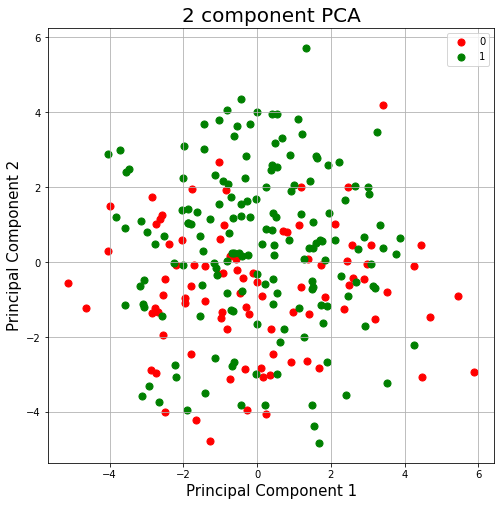

In [ ]:
# 2D visualization
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

After performing PCA (dimensionality reduction) to 2 features. From the above plot we can see that data is not linearly seperable. let us see if it improves by icreasing the number of dimensions. 

## Feature selection methods

https://www.geeksforgeeks.org/feature-selection-techniques-in-machine-learning/
We can also try many other feature selection methods:
1.Filter methods
2.Wrapper methods
3.Embedded methods



### Correlation 

Index(['target', '33', '65', '24', '183', '199', '201', '30', '289', '114',
       '164', '101', '272', '226', '17'],
      dtype='object')


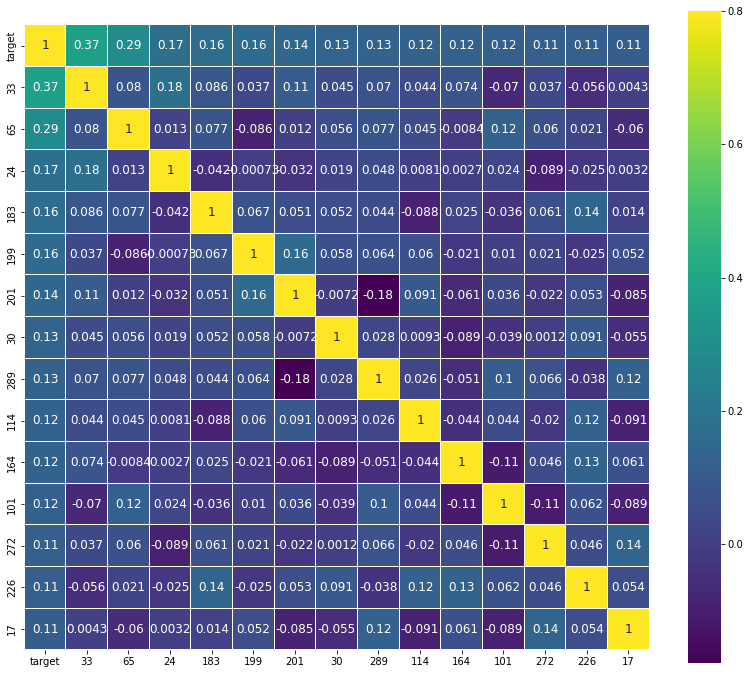

In [ ]:
correlation = df_train.corr()
k= 15
cols = correlation.nlargest(k,'target')['target'].index
print(cols)
cm = np.corrcoef(df_train[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

We can try using most important features as these can carry lots of information.

##Mutual Information

In [ ]:
#https://machinelearningmastery.com/feature-selection-with-numerical-input-data/#:~:text=Mutual%20Information%20Feature%20Selection,-Mutual%20information%20from&text=Mutual%20information%20is%20calculated%20between,value%20of%20the%20other%20variable.
X = df_train.drop(['id','target'],axis=1)
y = df_train['target']
select_k = 20
selection = SelectKBest(mutual_info_classif, k=select_k).fit(X, y)
print('Best {} selected Features are: {}'.format(select_k, list(X.columns[selection.get_support()])))

Best 20 selected Features are: ['2', '17', '18', '33', '36', '65', '91', '96', '98', '122', '130', '146', '165', '189', '193', '219', '231', '247', '289', '298']


## Recursive Feature Elimination

In [ ]:
X = df_train.drop(['id','target'],axis=1)
y = df_train['target']

In [ ]:
from sklearn.svm import SVR
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X, y)

In [ ]:
selector.ranking_

array([130,  23, 263,  98, 166, 238, 267, 288, 181,  28, 249, 141,  81,
        40, 248,   5,  21, 135,  27,  72,  19, 217, 203, 282,  10, 164,
        95,  30,  29, 178, 232,  83, 220,   1, 118,  68,  66, 244, 280,
       147, 140, 167, 151,  11,  82,  15, 103,  47, 112, 268, 106,  31,
       127,  67, 173,  99,  89, 208, 245, 174, 180, 237,  44, 198,  51,
         1, 126, 187, 152, 138,  92, 171,  34,   4, 170, 273, 266, 259,
       104,  84,  79, 243,  78,  60, 228, 233, 255,  69, 258,  86, 184,
         1,  75, 146, 247,  85, 192, 207,  20,  37, 185, 129, 162, 182,
       254,  43, 158,  76,  35, 110, 290,   3, 161, 123, 191, 200, 132,
       149, 253,  73, 246, 136, 221,  39, 113, 124, 269,  14,  41,  59,
       205,  58,  88, 159, 108, 116, 163, 227,  38, 225, 262, 234, 287,
        65, 168,  96,  71, 283, 119,  49,  97, 261,  63,  55, 292, 296,
       134,  94, 121, 291, 115,  62, 210,  64, 114, 122, 241, 209,  90,
       289, 239,  36, 252, 257,  24, 193,  13, 235, 274, 281, 14

###Embedding models

In [ ]:
df_test=df_test.drop(['id'],axis=1)

In [ ]:
from sklearn.linear_model import LogisticRegression, LassoCV , LassoLarsCV, RidgeCV
embd_models =  [
    ('LassoCv' , LassoCV(alphas =  [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75], n_jobs=-1) ),
    ('LassoLarsCV', LassoLarsCV(n_jobs=-1) ),
    ('RidgeCV', RidgeCV() )
]

Modeltype = 'EmbeddedF'

for model in embd_models:
    clf = model[1]
    clf.fit(X, y)
    pred = clf.predict(df_test)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


By trying above mention preprocessing and feature engineering steps we can try to improve model performance without overfitting